In [7]:
from keras.datasets import mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

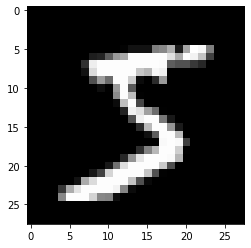

In [8]:
import matplotlib.pyplot as plt

# Display an image
plt.imshow(X_train[0], cmap="gray")
plt.show()


In [9]:
import numpy as np

# Preprocess the images
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0


In [10]:
from keras.utils import np_utils

# Encode the labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [11]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer='adam')

In [12]:
hist = model.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2269 - accuracy: 0.9349 - val_loss: 0.1083 - val_accuracy: 0.9676
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0896 - accuracy: 0.9732 - val_loss: 0.0832 - val_accuracy: 0.9748
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0578 - accuracy: 0.9823 - val_loss: 0.0635 - val_accuracy: 0.9804
Epoch 4/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0395 - accuracy: 0.9880 - val_loss: 0.0603 - val_accuracy: 0.9816
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.0594 - val_accuracy: 0.9831
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0212 - accuracy: 0.9941 - val_loss: 0.0590 - val_accuracy: 0.9817
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.0719 - val_accuracy: 0.9789
Epoc

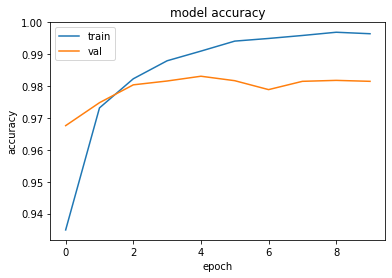

In [13]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

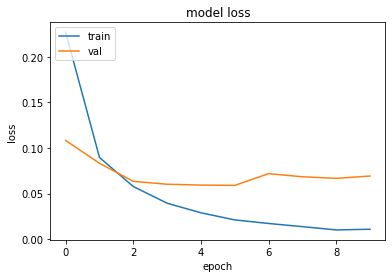

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


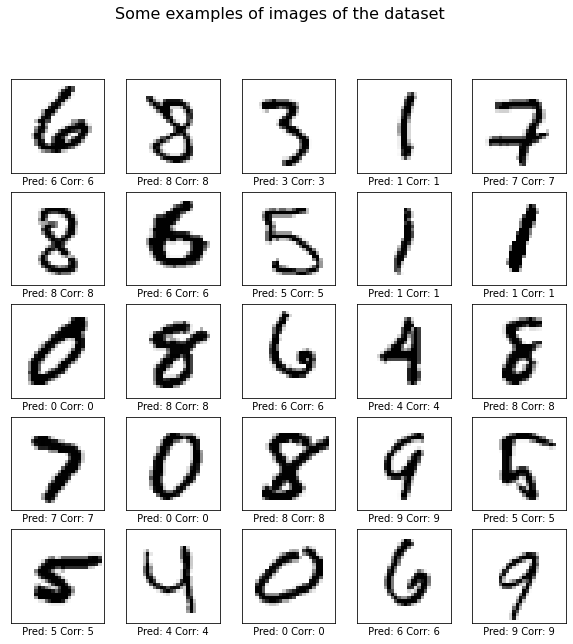

In [43]:
import random
(X_train, y_train), (x_test, y_test) = mnist.load_data()

fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
  j = random.randrange(0, len(pred))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[j], cmap=plt.cm.binary)
  plt.xlabel(f' Pred: {np.argmax(pred[j])} Corr: {y_test[j]} ')